In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

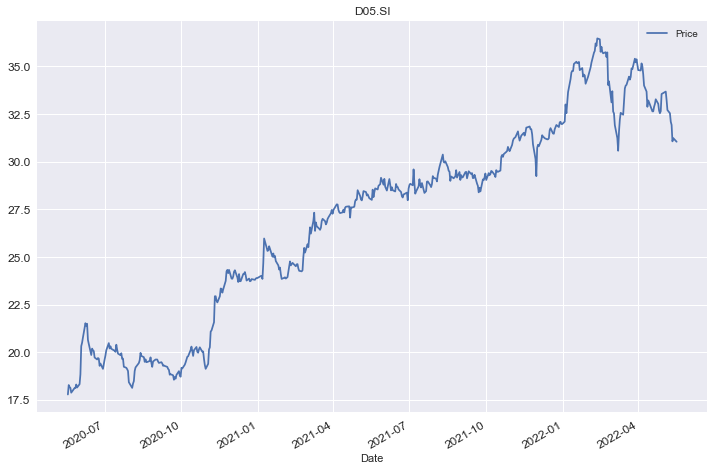

In [30]:
# Get Price Data
df = pd.read_csv("D05.SI.csv", parse_dates = ["Date"], index_col = "Date")
df.plot(figsize = (12, 8), title = "D05.SI", fontsize = 12)
plt.show()

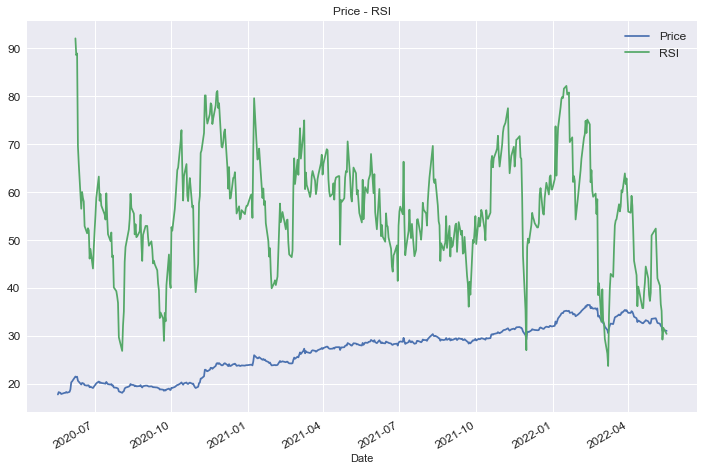

                Price        RSI
Date                            
2020-05-18  17.783651        NaN
2020-05-19  18.277643        NaN
2020-05-20  18.175116        NaN
2020-05-21  18.128513        NaN
2020-05-22  17.876860        NaN
...               ...        ...
2022-05-10  32.090000  36.590854
2022-05-11  31.920000  35.212934
2022-05-12  31.059999  29.218547
2022-05-13  31.230000  31.693911
2022-05-17  31.040001  30.413723

[503 rows x 2 columns]


Empty DataFrame
Columns: [Price, RSI]
Index: []

In [32]:
# RSI Strategy 
import RSI
df['RSI'] = RSI.rsi(df)
df.plot(figsize = (12, 8), title = "Price - RSI", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()
# df[df.index=='2020-06-07']

In [34]:
df.dropna(inplace=True)
print(df)

                Price        RSI
Date                            
2020-06-08  21.521202  92.007568
2020-06-09  21.390715  88.510527
2020-06-10  21.493240  88.868522
2020-06-11  20.645069  69.559099
2020-06-12  20.440016  65.834802
...               ...        ...
2022-05-10  32.090000  36.590854
2022-05-11  31.920000  35.212934
2022-05-12  31.059999  29.218547
2022-05-13  31.230000  31.693911
2022-05-17  31.040001  30.413723

[489 rows x 2 columns]


In [82]:
# Q: Do you start investing in? 
cross30 = (df["RSI"] >= 30) & (df["RSI"].shift() < 30)
pos30 = [int(elem) for elem in cross30]

cross80 = (df["RSI"] <=80) & (df["RSI"].shift() > 80)
pos80 = [-int(elem) for elem in cross80]

pos = [0]
for i in range(1, len(pos30)):
    if pos30[i] == 1: 
        pos.append(1)
    elif pos80[i] == -1:
        pos.append(-1)
    else:
        pos.append(pos[i-1])

df["position"] = pos
df
# verification done
# num = []
# for i in range(len(pos80)):
#     if pos[i] == -1 and pos[i-1] != -1:
#         num.append(i)
#     elif pos[i] == 1 and pos[i-1] != 1:
#         num.append(i)
# print(num)


Price        RSI  position
Date                                      
2020-06-08  21.521202  92.007568         0
2020-06-09  21.390715  88.510527         0
2020-06-10  21.493240  88.868522         0
2020-06-11  20.645069  69.559099        -1
2020-06-12  20.440016  65.834802        -1
...               ...        ...       ...
2022-05-10  32.090000  36.590854         1
2022-05-11  31.920000  35.212934         1
2022-05-12  31.059999  29.218547         1
2022-05-13  31.230000  31.693911         1
2022-05-17  31.040001  30.413723         1

[489 rows x 3 columns]

In [92]:
df["returns"] = np.log(df.Price.div(df.Price.shift(1)))

In [94]:
# Important! RSI is calculated at EOD => position is only reflected the next day!
df["strategy"] = df.position.shift(1) * df["returns"]

In [97]:
df.dropna(inplace = True)

In [99]:
df[["returns", "strategy"]].sum() # absolute performance

returns     0.366238
strategy    0.232503
dtype: float64

In [101]:
df[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     1.442299
strategy    1.261754
dtype: float64

In [104]:
df[["returns", "strategy"]].mean() * 252 # annualized return

returns     0.189123
strategy    0.120063
dtype: float64

In [106]:
df[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.195831
strategy    0.193817
dtype: float64

In [109]:
df["creturns"] = df["returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)
df

Price        RSI  position   returns  strategy  creturns  \
Date                                                                       
2020-06-09  21.390715  88.510527         0 -0.006082 -0.000000  0.993937   
2020-06-10  21.493240  88.868522         0  0.004782  0.000000  0.998701   
2020-06-11  20.645069  69.559099        -1 -0.040262 -0.000000  0.959290   
2020-06-12  20.440016  65.834802        -1 -0.009982  0.009982  0.949762   
2020-06-15  19.852819  56.504868        -1 -0.029149  0.029149  0.922477   
...               ...        ...       ...       ...       ...       ...   
2022-05-10  32.090000  36.590854         1 -0.013772 -0.013772  1.491088   
2022-05-11  31.920000  35.212934         1 -0.005312 -0.005312  1.483189   
2022-05-12  31.059999  29.218547         1 -0.027312 -0.027312  1.443228   
2022-05-13  31.230000  31.693911         1  0.005458  0.005458  1.451127   
2022-05-17  31.040001  30.413723         1 -0.006102 -0.006102  1.442299   

            cstrategy  
Date                   
2020-06-09   1.000000  
2020-06-10   1.000000  
2020-06-11   1.000000  
2020-06-12   1.010032  
2020-06-15   1.039906  
...               ...  
2022-05-10   1.304435  
2022-05-11   1.297525  
2022-05-12   1.262567  
2022-05-13   1.269477  
2022-05-17   1.261754  

[488 rows x 7 columns]

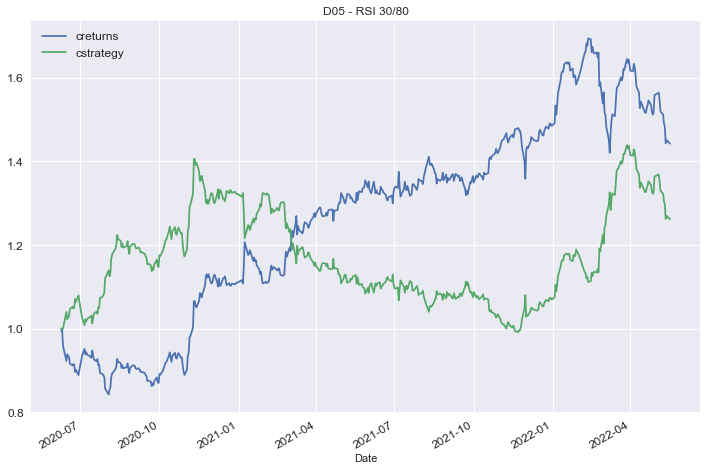

In [111]:
df[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "D05 - RSI 30/80", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()